In [1]:
import os

In [2]:
os.chdir('..')

In [3]:
os.listdir()

['demo', '__init__.py', '__pycache__', 'utils.py', 'data']

In [4]:
import utils

In [5]:
import pickle

In [6]:
with open('data/rank_to_factors.p', 'rb') as f:
    rank_to_factors = pickle.load(f)

In [7]:
rank_to_factors[9][0].shape # comment step (ordered)

(9, 9)

In [8]:
rank_to_factors[9][1].shape # threads (unordered)

(10000, 9)

In [9]:
rank_to_factors[9][2].shape # hypergraph_feats (unordered)

(164, 9)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def plot_factors(factors, d=3):
    a, b, c = factors
    rank = a.shape[1]
    fig, axes = plt.subplots(rank, d, figsize=(8, int(rank * 1.2 + 1)))
    factors_name = ["Comment step", "Threads", "Features"] if d==3 else ["Time", "Features"]
    for ind, (factor, axs) in enumerate(zip(factors[:d], axes.T)):
        axs[-1].set_xlabel(factors_name[ind])
        for i, (f, ax) in enumerate(zip(factor.T, axs)):
            sns.despine(top=True, ax=ax)
            ax.plot(f)
            axes[i, 0].set_ylabel("Factor " + str(i+1))
    fig.tight_layout()

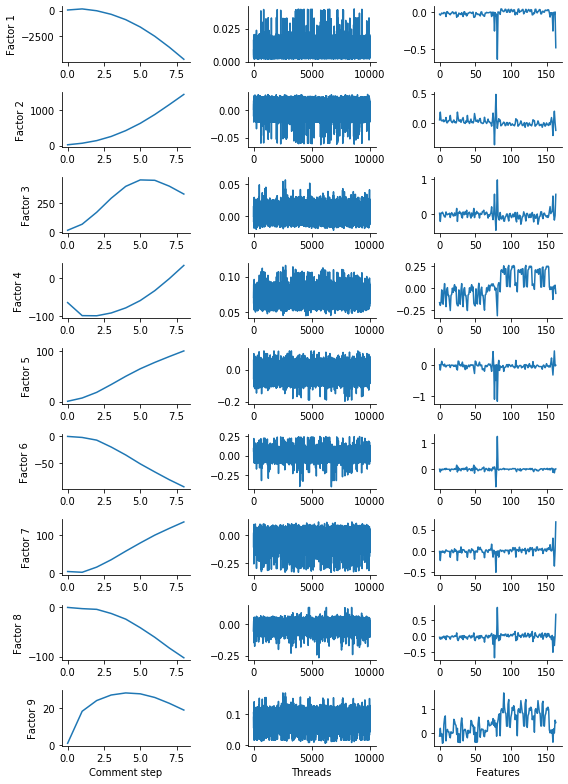

In [12]:
plot_factors(rank_to_factors[9])

## Checking invariance

Invariance to time:

In [13]:
with open('data/rank_to_factors_time_shuffled.p', 'rb') as f:
    rank_to_factors = pickle.load(f)

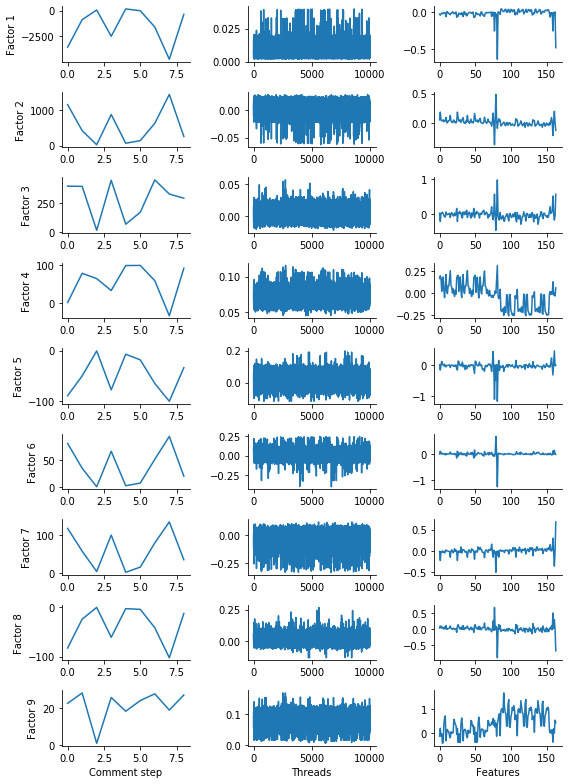

In [14]:
plot_factors(rank_to_factors[9])

The comment step ordering is different (which is to be expected), but everything else is the same.

Invariance to thread ordering:

In [18]:
with open('data/rank_to_factors_thread_shuffled.p', 'rb') as f:
    rank_to_factors = pickle.load(f)

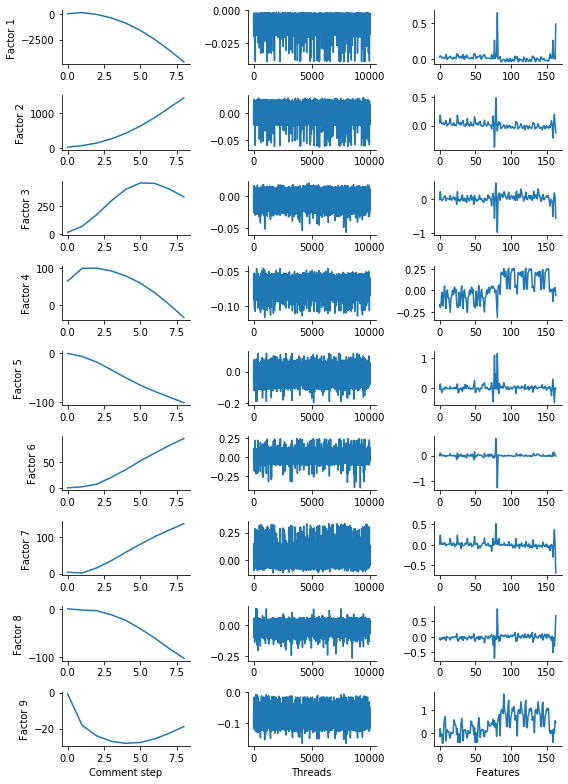

In [19]:
plot_factors(rank_to_factors[9])

The sign is different, but the plots are otherwise the same.